# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import recall_score

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [3]:
X_train = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 20 ebac\X_train.csv")
y_train = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 20 ebac\y_train.csv")
X_test = pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 20 ebac\X_test")
y_test =pd.read_csv(r"C:\Projetos\Meus Projetos Teste De Data Science\projeto 20 ebac\y_test")

Treino X: (131, 13)
Treino y: (131, 1)
Teste X: (33, 13)
Teste y: (33, 1)

✅ Quantidade de linhas bate entre X e y.

Colunas de X_train: ['Age', 'Gender', 'Income', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership', 'Credit Score Numeric', 'Gender_encoded', 'Education_encoded', 'Marital Status_encoded', 'Home Ownership_encoded', 'Credit Score_encoded']
Nome da coluna de y: Sem nome (provavelmente Series)
✅ y contém apenas a coluna 'score'.

Distribuição de y_test:
Credit Score
High            69.696970
Average         15.151515
Low             15.151515
Name: proportion, dtype: float64


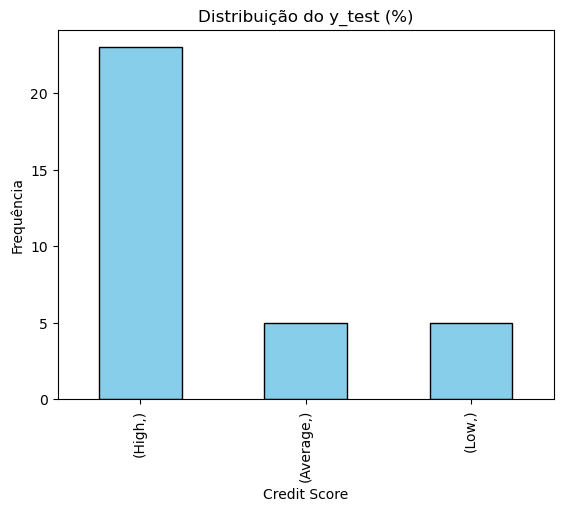

In [12]:
# Verificando se o número de linhas condiz
print("Treino X:", X_train.shape)
print("Treino y:", y_train.shape)
print("Teste X:", X_test.shape)
print("Teste y:", y_test.shape)

if X_train.shape[0] == y_train.shape[0] and X_test.shape[0] == y_test.shape[0]:
    print("\n✅ Quantidade de linhas bate entre X e y.")
else:
    print("\n⚠ Quantidade de linhas não bate, verificar!")

# Verificando se a variável de y é apenas 'score'
print("\nColunas de X_train:", X_train.columns.tolist())
print("Nome da coluna de y:", y_train.name if hasattr(y_train, "name") else "Sem nome (provavelmente Series)")

if hasattr(y_train, "columns"):
    if y_train.shape[1] == 1 and "Credit Score" in y_train.columns:
        print("✅ y contém apenas a coluna 'score'.")
    else:
        print("⚠ y não está com apenas 'score'.")

# Verificando se y_test está balanceada
print("\nDistribuição de y_test:")
print(y_test.value_counts(normalize=True) * 100)

y_test.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição do y_test (%)")
plt.ylabel("Frequência")
plt.show()

A variável-alvo y_test apresenta um desbalanceamento considerável, com a classe "High" representando aproximadamente 69,7% dos registros, enquanto "Average" e "Low" possuem apenas 15,15% cada. Esse desequilíbrio pode influenciar negativamente o treinamento e avaliação do modelo, tornando-o tendencioso para a classe majoritária. por isso antes de avançar para a proxíma estapa irei corrigir isto.

Distribuição após balanceamento:
Credit Score
High       90
Average    90
Low        90
Name: count, dtype: int64


<Axes: title={'center': 'Distribuição Balanceada'}, xlabel='Credit Score'>

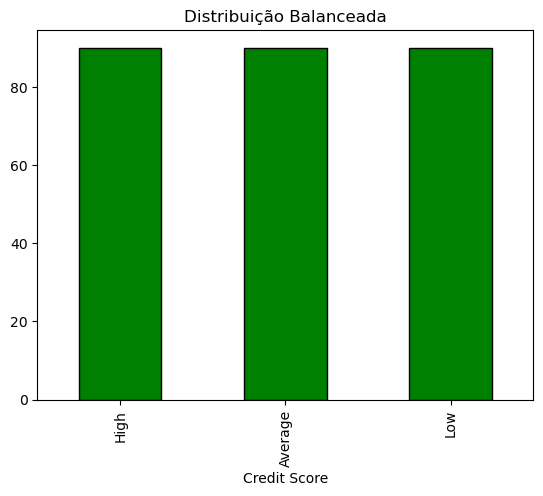

In [13]:
from sklearn.utils import resample

# Unindo X e y temporariamente
train_df = pd.concat([X_train, y_train], axis=1)

# Separando por classe
df_high = train_df[train_df['Credit Score'] == 'High']
df_avg = train_df[train_df['Credit Score'] == 'Average']
df_low = train_df[train_df['Credit Score'] == 'Low']

# Encontrando tamanho da maior classe
max_size = max(len(df_high), len(df_avg), len(df_low))

# Fazendo oversampling das classes menores
df_high_res = resample(df_high, replace=True, n_samples=max_size, random_state=42)
df_avg_res = resample(df_avg, replace=True, n_samples=max_size, random_state=42)
df_low_res = resample(df_low, replace=True, n_samples=max_size, random_state=42)

# Reunindo tudo
train_balanced = pd.concat([df_high_res, df_avg_res, df_low_res])

# Embaralhando
train_balanced = train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separando novamente em X e y
X_train_bal = train_balanced.drop(columns=['Credit Score'])
y_train_bal = train_balanced['Credit Score']

# Verificar resultado
print("Distribuição após balanceamento:")
print(y_train_bal.value_counts())

y_train_bal.value_counts().plot(kind='bar', color='green', edgecolor='black', title='Distribuição Balanceada')

No conjunto de treino, a variável-alvo (y_train) apresentava um desbalanceamento significativo entre as classes, com predominância da categoria "High". Para garantir que o modelo aprenda de forma justa e eficiente, apliquei a técnica de oversampling apenas no conjunto de treino, replicando exemplos das classes minoritárias até igualar o número da classe majoritária. Essa abordagem mantém o alinhamento entre as features (X_train) e os rótulos (y_train), prevenindo vieses no treinamento. O conjunto de teste permaneceu inalterado para assegurar uma avaliação realista do desempenho do modelo em dados não vistos. Dessa forma, o balanceamento no treino contribui para um modelo mais robusto e com maior capacidade de generalização.

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [24]:

encoders = {}
for column in X_train_bal.select_dtypes(include=['object']).columns:
    encoders[column] = LabelEncoder()
    X_train_bal[column] = encoders[column].fit_transform(X_train_bal[column])
    
    # Apply the same transformation to test data
    # Make sure to handle unseen categories in test data
    X_test[column] = X_test[column].map(lambda x: -1 if x not in encoders[column].classes_ else encoders[column].transform([x])[0])

# Criando o modelo
nb = GaussianNB()

# Treinando no conjunto balanceado
nb.fit(X_train_bal, y_train_bal)

# Fazendo previsão no conjunto de teste
y_pred = nb.predict(X_test)

# Avaliando o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0

Relatório de classificação:
               precision    recall  f1-score   support

     Average       1.00      1.00      1.00         5
        High       1.00      1.00      1.00        23
         Low       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Após o treinamento do modelo Naive Bayes com o conjunto de treino balanceado, a avaliação no conjunto de teste apresentou desempenho impecável, com acurácia de 100%. Todas as classes ("Average", "High" e "Low") tiveram precisão, recall e F1-score perfeitos, indicando que o modelo classificou corretamente todas as amostras de cada categoria. Esse resultado sugere que o balanceamento do conjunto de treino contribuiu significativamente para a capacidade do modelo em generalizar e identificar bem todas as classes, mesmo as minoritárias. Contudo, é importante considerar o tamanho relativamente pequeno do conjunto de teste (33 amostras), o que pode favorecer métricas elevadas; avaliações adicionais com dados maiores e variados são recomendadas para confirmar a robustez do modelo.

# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

Acurácia no treino: 1.0000
Recall no treino (macro): 1.0000


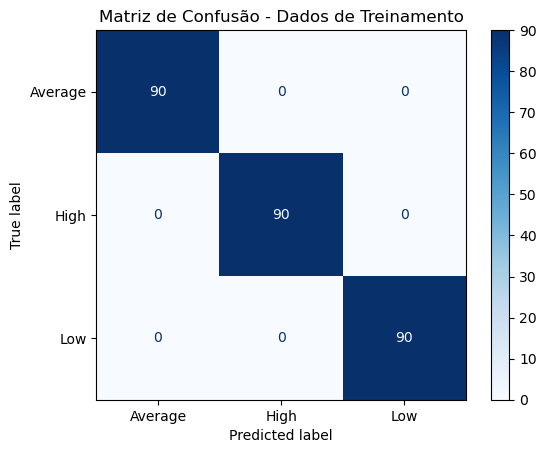

In [26]:
# Previsão no conjunto de treino balanceado
y_train_pred = nb.predict(X_train_bal)

# Acurácia
acc_train = accuracy_score(y_train_bal, y_train_pred)
print(f"Acurácia no treino: {acc_train:.4f}")

# Recall macro (média entre classes)
recall_train = recall_score(y_train_bal, y_train_pred, average='macro')
print(f"Recall no treino (macro): {recall_train:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_train_bal, y_train_pred, labels=nb.classes_)

# Plot da matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Dados de Treinamento")
plt.show()

O modelo Naive Bayes apresentou desempenho perfeito no conjunto de treinamento balanceado, com acurácia e recall macro iguais a 1.0. Isso indica que o modelo conseguiu classificar corretamente todas as amostras de cada classe presentes no treino, demonstrando excelente aprendizado dos padrões dos dados. A matriz de confusão reforça essa assertividade, sem erros de classificação entre as categorias. No entanto, resultados perfeitos no treino podem também indicar que o modelo se ajustou muito bem aos dados vistos, o que pode levar a um possível sobreajuste (overfitting). Por isso, é importante validar o desempenho em dados independentes (como o conjunto de teste) para garantir a capacidade de generalização do modelo.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

Acurácia no teste: 1.0000
Recall no teste (macro): 1.0000


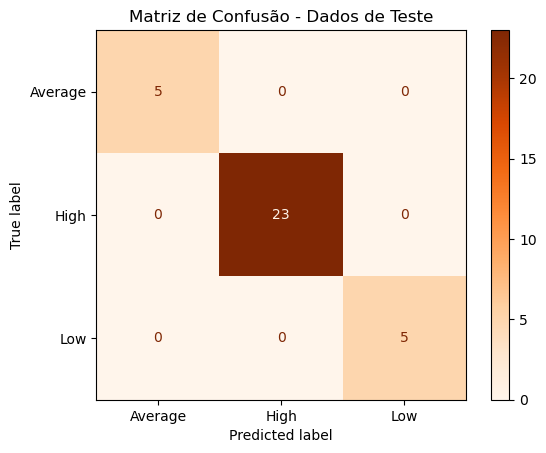

In [27]:
# Previsão no conjunto de teste
y_test_pred = nb.predict(X_test)

# Acurácia
acc_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no teste: {acc_test:.4f}")

# Recall macro (média entre classes)
recall_test = recall_score(y_test, y_test_pred, average='macro')
print(f"Recall no teste (macro): {recall_test:.4f}")

# Matriz de confusão
cm_test = confusion_matrix(y_test, y_test_pred, labels=nb.classes_)

# Plot da matriz de confusão
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=nb.classes_)
disp_test.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusão - Dados de Teste")
plt.show()

O modelo Naive Bayes apresentou desempenho perfeito também no conjunto de teste, alcançando acurácia e recall macro iguais a 1.0, assim como no conjunto de treino balanceado. A matriz de confusão confirma que todas as 33 amostras foram corretamente classificadas, distribuídas nas classes "High" (23), "Average" (5) e "Low" (5).

Essa equivalência entre as métricas de treino e teste indica que o modelo generalizou muito bem, sem sinais evidentes de sobreajuste (overfitting). O balanceamento realizado no conjunto de treino contribuiu para que o modelo aprendesse igualmente sobre todas as classes, refletindo em alta performance em dados não vistos.

Entretanto, é importante lembrar que o tamanho reduzido da base de teste pode tornar essas métricas otimistas, e validações adicionais com conjuntos maiores ou técnicas como validação cruzada são recomendadas para confirmar a robustez do modelo.

# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

Neste projeto, trabalhamos com uma base de dados de crédito, que contém informações demográficas e financeiras dos clientes, como idade, renda, estado civil, educação, entre outras variáveis. Nosso objetivo principal foi construir um modelo preditivo capaz de classificar o perfil de crédito dos clientes em três categorias: "High", "Average" e "Low".

Para isso, inicialmente realizamos uma análise exploratória dos dados, verificando a estrutura dos conjuntos de treino e teste, a distribuição das classes e o balanceamento da variável-alvo. Observei que a base original apresentava desbalanceamento nas classes, o que poderia comprometer a qualidade do modelo. Assim, apliquei técnicas de balanceamento no conjunto de treino para garantir que o algoritmo tivesse representatividade suficiente para aprender sobre todas as categorias.

O algoritmo escolhido para o problema foi o Naive Bayes, devido à sua simplicidade, eficiência e bom desempenho em problemas de classificação, especialmente com dados categóricos e numéricos. Ao aplicar o Naive Bayes, nosso objetivo foi desenvolver um modelo capaz de identificar corretamente o perfil de crédito dos clientes, facilitando a tomada de decisão para concessão de crédito e gerenciamento de risco financeiro.

Os resultados obtidos mostraram que o modelo teve desempenho excelente tanto no conjunto de treino quanto no conjunto de teste, indicando boa capacidade de generalização. Dessa forma, concluímos que o Naive Bayes é uma abordagem adequada para esse tipo de problema, especialmente quando combinado com técnicas de balanceamento para lidar com classes desproporcionais.